In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [100]:
data_file1 = "../rgbdata_strength_price.csv"
data_file2 = "../rgbdata_freq.csv"

df1 = pd.read_csv(data_file1)
df2 = pd.read_csv(data_file2)

df = pd.merge(left=df2, right=df1, left_on="image_id", right_on="image_id")
df = df.dropna(axis=0)

data = df.drop(["image_id"], axis=1)

data.describe()

,color_count,avg_use_of_same_color,1_used_R,1_used_G,1_used_B,2_used_R,2_used_G,2_used_B,3_used_R,3_used_G,...,4_used_B,5_used_R,5_used_G,5_used_B,R_strength,G_strength,B_strength,width,height,price_eur
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,...,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2.832000e+03
mean,46461.125706,14.928982,171.463630,166.709746,161.699506,160.150424,154.210805,148.966102,166.203743,160.290607,...,147.930085,164.503531,158.789548,152.237288,0.604581,0.564352,0.533219,444.187500,480.448093,2.533680e+04
std,38014.187997,41.508327,91.568977,91.124029,92.407746,87.950116,86.958073,87.383956,89.236471,88.984121,...,87.445449,87.362960,86.537755,87.980282,0.181696,0.181095,0.191582,1.053067,155.345215,9.872793e+04
min,256.000000,1.118395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005673,0.002324,0.006053,439.000000,81.000000,8.700000e+01
25%,16943.000000,3.044112,86.750000,71.000000,62.000000,62.750000,61.000000,54.750000,76.000000,65.000000,...,53.000000,74.750000,67.000000,57.750000,0.487849,0.439649,0.392272,443.000000,352.000000,2.904000e+03
50%,37284.000000,5.362177,218.000000,211.000000,203.000000,203.000000,192.000000,183.000000,209.500000,200.000000,...,181.000000,205.000000,196.000000,187.000000,0.609910,0.564491,0.532415,445.000000,454.000000,7.500000e+03
75%,66907.250000,12.242704,244.000000,241.000000,240.000000,233.000000,229.000000,227.000000,239.000000,235.000000,...,226.000000,236.000000,231.250000,229.000000,0.734760,0.696539,0.676169,445.000000,591.000000,1.840000e+04
max,262534.000000,1131.726562,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,0.988684,0.985326,0.985566,445.000000,1534.000000,2.760000e+06


In [3]:
X = data.drop(["price_eur"], axis=1)
y = data["price_eur"].to_numpy()
X_test = data["1_used_B"].to_numpy()
X_test.reshape(-1,1)


data.head(5)
#data["price_eur"].max()

,color_count,avg_use_of_same_color,1_used_R,1_used_G,1_used_B,2_used_R,2_used_G,2_used_B,3_used_R,3_used_G,...,4_used_B,5_used_R,5_used_G,5_used_B,R_strength,G_strength,B_strength,width,height,price_eur
0,63831,2.963466,0,0,0,28,19,2,4,4,...,4,4,4,2,0.454052,0.374730,0.348599,443,427,12100
1,86055,3.461833,30,88,195,241,85,45,230,178,...,149,242,86,46,0.551542,0.471525,0.404724,442,674,3388
2,81176,2.439453,219,218,213,225,225,223,218,217,...,220,217,216,211,0.513464,0.575738,0.532064,445,445,700
3,20330,8.383424,255,255,255,0,0,0,7,9,...,37,8,10,9,0.495756,0.466193,0.441848,445,383,7865
4,54126,3.658593,217,221,222,211,215,216,190,194,...,220,193,197,198,0.654345,0.651009,0.643222,445,445,4114


In [101]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=1)

lin_regr = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)
y_pred_train = lin_regr.predict(X_train_poly)

X_val_poly = poly.fit_transform(X_val)
y_pred_val = lin_regr.predict(X_val_poly)


tr_error = mean_absolute_error(y_train, y_pred_train)
val_error = mean_absolute_error(y_val, y_pred_val)

print("training error: " + str(tr_error) + " euros")
print("validation error: " + str(val_error) + " euros")

training error: 27399.443598319398 euros
validation error: 30921.7317297336 euros


In [125]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_rtest, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=1)

nof_layers = 63
neurons_on_layer = 63
hidden_layer_sizes = tuple([neurons_on_layer] * nof_layers)

mlp_regr = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, random_state=1)

mlp_regr.fit(X_train, y_train)

y_pred_train = mlp_regr.predict(X_train)
y_pred_val = mlp_regr.predict(X_val)

tr_error = mean_absolute_error(y_train, y_pred_train)
val_error = mean_absolute_error(y_val, y_pred_val)

print("training error: " + str(tr_error) + " euros")
print("validation error: " + str(val_error) + " euros")


training error: 22482.173316715147 euros
validation error: 26315.98572511528 euros


In [126]:
y_pred_test = mlp_regr.predict(X_test)
test_error = mean_absolute_error(y_test, y_pred_test)

print("test error: " + str(test_error) + " euros")

test error: 25087.31837534653 euros


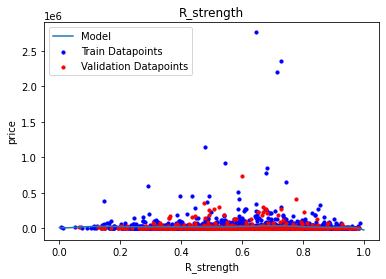

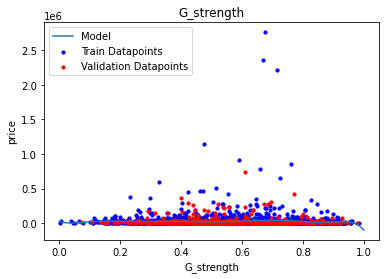

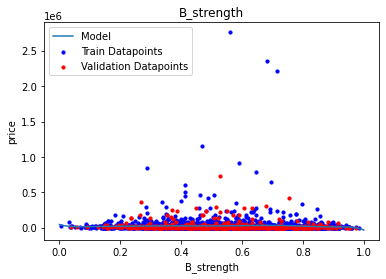

In [7]:


for c in ["R", "G", "B"]:
    feature = c + "_strength"

    X_test = data[feature].to_numpy().reshape(-1,1)
    y = data["price_eur"]
    X_train, X_val, y_train, y_val = train_test_split(X_test, y, test_size=0.2, random_state=1)

    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=9)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)

    X_val_poly = poly.fit_transform(X_val)
    
    X_fit = np.linspace(0, 1, 100)
    #plt.tight_layout()
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1,1))), label="Model")
    plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")
    plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")
    plt.xlabel(feature)
    plt.legend(loc="best")
    plt.ylabel('price')
    plt.title(feature)
    plt.show()



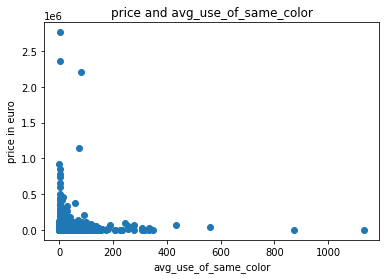

In [6]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

feature = "avg_use_of_same_color"
X_test = data[feature].to_numpy().reshape(-1,1)

ax.scatter(X_test, y)
ax.set_ylabel("price in euro")
ax.set_xlabel(feature)
ax.set_title("price and " + feature)

plt.show()